In [53]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [54]:
# create data
N = 2000

# generate data
data = torch.randint(low = -10, high = 11, size = (N, 2)).float()

# "labels"
labels = torch.sum(data, axis = 1, keepdim = True)

# print the data
for i in range(N):
    print(data[i], labels[i])

tensor([ 7., -5.]) tensor([2.])
tensor([-6., -7.]) tensor([-13.])
tensor([4., 1.]) tensor([5.])
tensor([1., 7.]) tensor([8.])
tensor([10.,  6.]) tensor([16.])
tensor([10., -2.]) tensor([8.])
tensor([1., 9.]) tensor([10.])
tensor([-2.,  7.]) tensor([5.])
tensor([6., 4.]) tensor([10.])
tensor([-6.,  8.]) tensor([2.])
tensor([ 3., 10.]) tensor([13.])
tensor([-5., -5.]) tensor([-10.])
tensor([3., 4.]) tensor([7.])
tensor([-3., -9.]) tensor([-12.])
tensor([ 4., -1.]) tensor([3.])
tensor([ 8., -2.]) tensor([6.])
tensor([-7., -2.]) tensor([-9.])
tensor([-5.,  4.]) tensor([-1.])
tensor([-3.,  6.]) tensor([3.])
tensor([10., -2.]) tensor([8.])
tensor([-3., -4.]) tensor([-7.])
tensor([7., 0.]) tensor([7.])
tensor([-9., -6.]) tensor([-15.])
tensor([-3., -8.]) tensor([-11.])
tensor([1., 5.]) tensor([6.])
tensor([-10.,   0.]) tensor([-10.])
tensor([1., 3.]) tensor([4.])
tensor([2., 1.]) tensor([3.])
tensor([ -3., -10.]) tensor([-13.])
tensor([1., 7.]) tensor([8.])
tensor([ 8., -5.]) tensor([3.])
ten

In [55]:
# a function that builds the model

def createADDmodel():

    # model architecture
    ADDclassify = nn.Sequential(
        nn.Linear(2, 30), # input layer
        nn.ReLU(), # activation unit
        nn.Linear(30, 1), # hidden layer
        nn.ReLU(), # activation unit
        nn.Linear(1, 1) # output unit
    )

    # loss function
    lossfun = nn.MSELoss()

    # optimizer
    optimizer = torch.optim.Adam(ADDclassify.parameters(), lr = .01)

    # model output
    return ADDclassify, lossfun, optimizer

In [56]:
# a function that trains the model

# a fixed parameter
numepochs = 10

def trainTheModel(ADDmodel):

    # initialize losses
    losses = torch.zeros(numepochs)

    # loop over epochs
    for epochi in range(numepochs):

        numloss = []
        # loop thru "minibatches" of N = 1
        for num, ans in zip(data, labels):

            # forward pass
            yHat = ADDmodel(num)

            # compute the loss
            loss = lossfun(yHat, ans)
            numloss.append(loss.item())

            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        losses[epochi] = np.mean(numloss)

        # final forward pass
        with torch.no_grad():
            predictions = ADDmodel(data)

        # compute predictions and report accuracy
        trainacc = 100*torch.mean((np.abs(predictions - labels) < 1).float()) # < 1 for rounding

        # now test with new data
        # create brand new test data
        TESTdata = torch.randint(low = -10, high = 11, size = (N, 2)).float()
        TESTlabels = torch.sum(TESTdata, axis = 1, keepdim = True)

        # evaluate the model and compute accuracy
        with torch.no_grad():
            predictions = ADDmodel(TESTdata)
        testacc = 100*torch.mean((np.abs(predictions - TESTlabels) < 1).float())

        return losses, trainacc, testacc, ADDmodel

In [57]:
# test the model once to make sure it runs
AddingMachine, lossfun, optimizer = createADDmodel()
losses, trainacc, testacc, ADDmodel = trainTheModel(AddingMachine)

trainacc, testacc

C:\Users\Admin\AppData\Local\Temp\ipykernel_13968\2162626082.py:37: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  trainacc = 100*torch.mean((np.abs(predictions - labels) < 1).float()) # < 1 for rounding
C:\Users\Admin\AppData\Local\Temp\ipykernel_13968\2162626082.py:47: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  testacc = 100*torch.mean((np.abs(predictions - TESTlabels) < 1).float())


(tensor(78.4000), tensor(78.7500))

In [58]:
# run the model 10 times to check reproducibility

for i in range(10):

    # create a new "machine" and train it
    AddingMachine, lossfun, optimizer = createADDmodel()
    _, trainacc, testacc, ADDmodel = trainTheModel(AddingMachine)

    # report accuracy
    print('Model instance %s, final TRAIN/TEST accuracies: %g%%, %g%%' %(i+1,trainacc,testacc))

C:\Users\Admin\AppData\Local\Temp\ipykernel_13968\2162626082.py:37: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  trainacc = 100*torch.mean((np.abs(predictions - labels) < 1).float()) # < 1 for rounding
C:\Users\Admin\AppData\Local\Temp\ipykernel_13968\2162626082.py:47: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  testacc = 100*torch.mean((np.abs(predictions - TESTlabels) < 1).float())


Model instance 1, final TRAIN/TEST accuracies: 81%, 83.65%
Model instance 2, final TRAIN/TEST accuracies: 78.4%, 79.8%
Model instance 3, final TRAIN/TEST accuracies: 79.35%, 80.4%
Model instance 4, final TRAIN/TEST accuracies: 9.05%, 8.45%
Model instance 5, final TRAIN/TEST accuracies: 8.95%, 10.65%
Model instance 6, final TRAIN/TEST accuracies: 77.15%, 79.5%
Model instance 7, final TRAIN/TEST accuracies: 9.05%, 8.35%
Model instance 8, final TRAIN/TEST accuracies: 78.4%, 79.1%
Model instance 9, final TRAIN/TEST accuracies: 78.4%, 79.2%
Model instance 10, final TRAIN/TEST accuracies: 78.4%, 80%


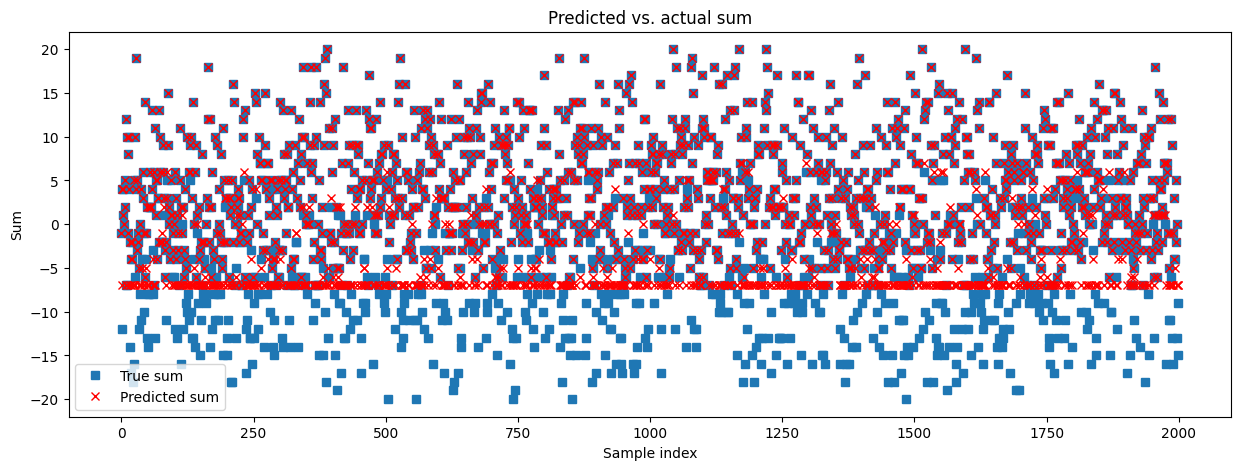

In [59]:
# some plots from the final model

data = torch.randint(low=-10,high=11,size=(N,2)).float()
labels = torch.sum(data,axis=1,keepdim=True)

# evaluate the model and compute accuracy
with torch.no_grad():
  predictions = ADDmodel(data)


# true and predicted values
fig = plt.figure(figsize=(15,5))
plt.plot(labels,'s')
plt.plot(np.round(predictions.detach()),'rx')
plt.legend(['True sum','Predicted sum'])
plt.xlabel('Sample index')
plt.ylabel('Sum')
plt.title('Predicted vs. actual sum')
plt.show()